In [1]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [36]:
path = untar_data(URLs.MNIST)

In [45]:
path = Path('/home/ilua/.fastai/data/mnist_png')

In [28]:
os.getcwd()

'/home/ilua'

In [47]:
path

Path('.')

In [46]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [83]:
def get_dls(bs=64):
    return DataBlock(
        blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), 
        get_items=get_image_files, 
        splitter=GrandparentSplitter('training','testing'),
        get_y=parent_label,
        batch_tfms=Normalize()
    ).dataloaders(path, bs=bs)

dls = get_dls()

In [90]:
def conv(ni, nf, ks=3, act=True):
    layers = [nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)]
    if act: layers.append(nn.ReLU())
    layers.append(nn.BatchNorm2d(nf))
    return nn.Sequential(*layers)

def simple_cnn():
    return sequential(
        conv(1 ,32, ks=5),        #14x14
        nn.Dropout(0.2),
        conv(32 ,32),             #7x7
        nn.Dropout(0.2),
        Flatten(),
        nn.Dropout(0.2),
        nn.Linear(32 * 7 * 7, 10)
    )
    
# def simple_cnn():
#     return sequential(
#         conv(1 ,64, ks=5),        #14x14
#         conv(64 ,64),             #7x7
#         Flatten(),
#         nn.Linear(64 * 7 * 7, 10)
#     )

def fit(epochs=1, lr=0.06):
    learn = Learner(dls, simple_cnn(), loss_func=F.cross_entropy,
                    metrics=accuracy, cbs=ActivationStats(with_hist=True))
    learn.fit_one_cycle(epochs, lr)
    return learn

In [93]:
learn = fit(5, lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.500318,0.397708,0.945200,00:14
1,0.705064,0.273226,0.971800,00:15
2,0.403547,0.180962,0.974300,00:17
3,0.108731,0.045584,0.984900,00:15
4,0.054514,0.032365,0.988100,00:15


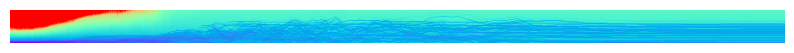

In [82]:
matplotlib.rcParams['image.cmap'] = 'rainbow_r'
learn.activation_stats.color_dim(-5)
#  64 channels batch size 64

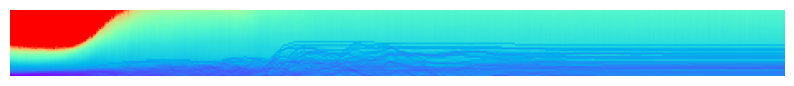

In [86]:
matplotlib.rcParams['image.cmap'] = 'rainbow_r'
learn.activation_stats.color_dim(-5)
#  64 channels batch size 128

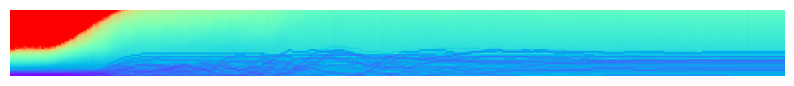

In [89]:
learn.activation_stats.color_dim(-5)
#  32 channels batch size 64

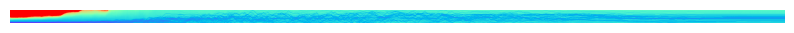

In [94]:
learn.activation_stats.color_dim(-5)
#  32 channels + DropOut 5 epoch batch size 64

In [138]:
learn.summary()

Sequential (Input shape: 128 x 1 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 32 x 14 x 14  
Conv2d                                    832        True      
ReLU                                                           
BatchNorm2d                               64         True      
Dropout                                                        
____________________________________________________________________________
                     128 x 32 x 7 x 7    
Conv2d                                    9248       True      
ReLU                                                           
BatchNorm2d                               64         True      
Dropout                                                        
____________________________________________________________________________
                     128 x 1568          
Flatten                                                        
Dropout                             

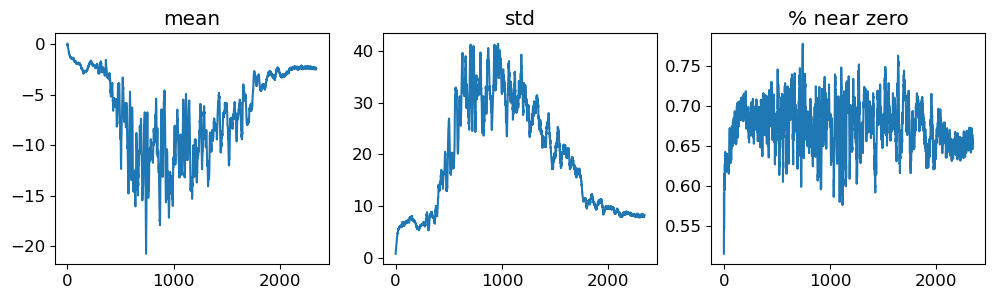

In [126]:
learn.activation_stats.plot_layer_stats(4)

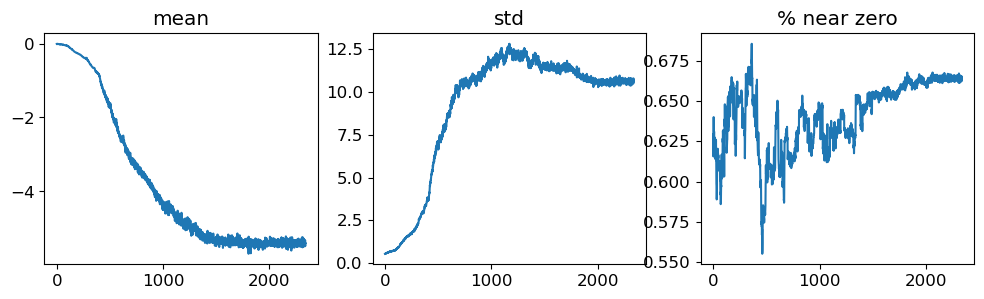

In [105]:
learn.activation_stats.plot_layer_stats(-5)